María Montero Gómez




24/11/2022

# Ejercicio con regularizadores

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()# Descarga los datos de MNIST

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Prepara con reshape y normaliza las imágenes tanto de entrenamiento como de test
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28,28,1))
test_images = test_images.astype('float32') / 255


In [4]:
# Crear un subconjunto de imágenes de entrenamiento que llamaré
# validation_images, para hacer las validaciones, con las 10000 últimas imágenes 
# del set de datos de entrenamiento (train_images) (obviamente, lo mismo con las
# etiquetas correspondientes -> validation_labels)
validation_images=train_images[50000:]
validation_labels=train_labels[50000:]
# Deja preparadas las 50K 
# primeras imágenes y etiquetas para entrenamiento (train_images y train_labels)
train_images=train_images[0:49999]
train_labels=train_labels[0:49999]



In [27]:
def crea_modelo(regularizador):
  # Define una función que recibe un número del 0 al 4 que creará:
  # un modelo secuencial con una capa de entrada densa de 512 neuronas
  # con activación relu y la capa de salida que le corresponda según el problema
  model = models.Sequential()
  # Ahora, en función del número del regularizador:
  # Si es 0, no mete ningún regularizador
  if regularizador==0:
    model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
 # Si es 1, mete un regularizador de tipo l1 y valor 0.001
  elif regularizador==1:
    model.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(28*28,)))
  # Si es 2, mete un regularizador de tipo l2 y valor 0.001 
  elif regularizador==2:
    model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28*28,)))
  # Si es 3, mete un regularizador de tipo l1_l2 y valor 0.001 para ambos
  elif regularizador==3:
    model.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(0.001), activation='relu', input_shape=(28*28,)))
  # Si es 4, mete un Dropout del 50% después de la primera capa densa
  elif regularizador==4:
    model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
    model.add(layers.Dropout(0.6))
  # Si es distinto que estos valores, escribe el error y retorna
  else:
    print("Error. Debe ser un número del 0 al 4")
    return 0
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado
  model.add(layers.Dense(10, activation='softmax'))
  model.summary()
  return model

In [6]:
def compila_modelo(modelo): 
  # Define una función que recibe un modelo, lo compila con un optimizador
  # 'rmsprop', con una función de pérdida 'sparse_categorical_crossentropy' y
  # una métrica de precisión. 
  modelo.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  #La función retorna el modelo
  return modelo

In [7]:
def entrena_modelo(modelo):
  # Define una función que entrena el modelo que se le pasa por parámetro,
  # con las imágenes y etiquetas de entrenamiento, con 30 iteraciones y 128
  # de tamaño de minilote y con el validation_data creado más arriba.
  history=modelo.fit(train_images, 
                      train_labels, 
                      epochs=30, 
                      batch_size=128,
                     validation_data=(validation_images,validation_labels))
  # Esta función devuelve un history
  return history

In [8]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [9]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

## Una vez definidas todas las funciones anteriores, ejecuta las siguientes llamadas a dichas funciones y deduce que está pasando y, para este contexto, que es lo que mejor está funcionando

### Caso 0, sin regularizadores

In [ ]:
network0 = crea_modelo(0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network0 = compila_modelo(network0)

In [ ]:
historia0 = entrena_modelo(network0)

Epoch 1/30
391/391 [==============================] - 4s 4ms/step - loss: 0.2811 - accuracy: 0.9186 - val_loss: 0.1350 - val_accuracy: 0.9620
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1146 - accuracy: 0.9661 - val_loss: 0.1092 - val_accuracy: 0.9675
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0748 - accuracy: 0.9776 - val_loss: 0.0935 - val_accuracy: 0.9710
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0540 - accuracy: 0.9843 - val_loss: 0.0890 - val_accuracy: 0.9751
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0405 - accuracy: 0.9881 - val_loss: 0.0759 - val_accuracy: 0.9780
Epoch 6/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0302 - accuracy: 0.9914 - val_loss: 0.0750 - val_accuracy: 0.9785
Epoch 7/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0227 - accuracy: 0.9933 - val_loss: 0.0750 - val_accuracy: 0.9798
Epoch 

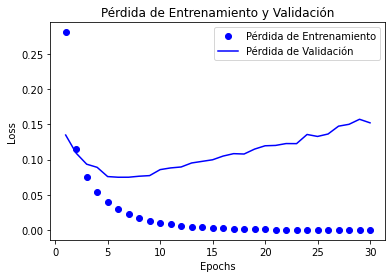

In [ ]:
pinta_perdida_entrenamiento_validacion(historia0)

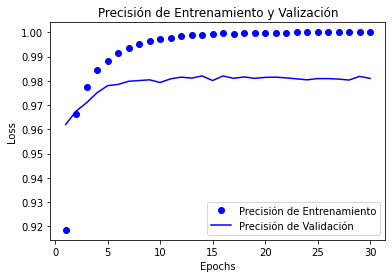

In [ ]:
pinta_precision_entrenamiento_validacion(historia0)

### Caso 1: Con regularizador l1

In [ ]:
network1 = crea_modelo(1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network1 = compila_modelo(network1)

In [ ]:
historia1 = entrena_modelo(network1)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 2.1398 - accuracy: 0.8460 - val_loss: 1.0599 - val_accuracy: 0.8645
Epoch 2/30
391/391 [==============================] - 1s 3ms/step - loss: 0.9581 - accuracy: 0.8818 - val_loss: 0.8075 - val_accuracy: 0.9203
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.8349 - accuracy: 0.9030 - val_loss: 0.7520 - val_accuracy: 0.9280
Epoch 4/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7583 - accuracy: 0.9151 - val_loss: 0.7039 - val_accuracy: 0.9339
Epoch 5/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7095 - accuracy: 0.9232 - val_loss: 0.6466 - val_accuracy: 0.9406
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.6721 - accuracy: 0.9305 - val_loss: 0.6261 - val_accuracy: 0.9439
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 0.6440 - accuracy: 0.9359 - val_loss: 0.6420 - val_accuracy: 0.9354
Epoch 

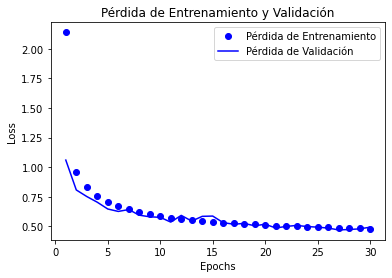

In [ ]:
pinta_perdida_entrenamiento_validacion(historia1)

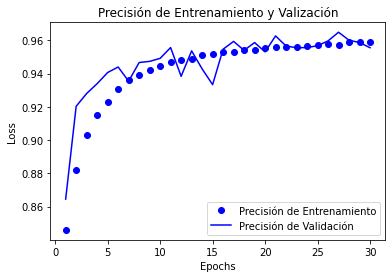

In [ ]:
pinta_precision_entrenamiento_validacion(historia1)

### Caso 2: Con regularizador l2

In [ ]:
network2 = crea_modelo(2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network2 = compila_modelo(network2)

In [ ]:
historia2 = entrena_modelo(network2)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.5257 - accuracy: 0.9124 - val_loss: 0.3115 - val_accuracy: 0.9511
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.2655 - accuracy: 0.9548 - val_loss: 0.2289 - val_accuracy: 0.9615
Epoch 3/30
391/391 [==============================] - 2s 5ms/step - loss: 0.2102 - accuracy: 0.9634 - val_loss: 0.2191 - val_accuracy: 0.9583
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1863 - accuracy: 0.9677 - val_loss: 0.1760 - val_accuracy: 0.9713
Epoch 5/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1724 - accuracy: 0.9691 - val_loss: 0.1926 - val_accuracy: 0.9629
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1624 - accuracy: 0.9714 - val_loss: 0.2114 - val_accuracy: 0.9610
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1581 - accuracy: 0.9722 - val_loss: 0.1574 - val_accuracy: 0.9725
Epoch 

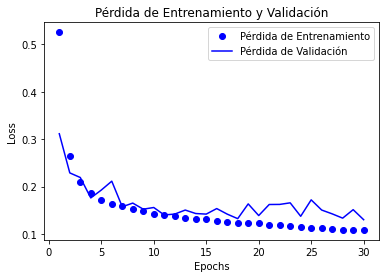

In [ ]:
pinta_perdida_entrenamiento_validacion(historia2)

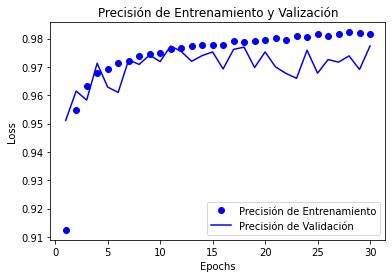

In [ ]:
pinta_precision_entrenamiento_validacion(historia2)

### Caso 3: Con regularizador l1_l2

In [ ]:
network3 = crea_modelo(3)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network3 = compila_modelo(network3)

In [ ]:
historia3 = entrena_modelo(network3)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 2.3490 - accuracy: 0.8239 - val_loss: 1.0421 - val_accuracy: 0.8886
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 1.0668 - accuracy: 0.8556 - val_loss: 1.0112 - val_accuracy: 0.8812
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.9567 - accuracy: 0.8755 - val_loss: 0.8852 - val_accuracy: 0.9025
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.8801 - accuracy: 0.8915 - val_loss: 0.8546 - val_accuracy: 0.8946
Epoch 5/30
391/391 [==============================] - 2s 4ms/step - loss: 0.8266 - accuracy: 0.9024 - val_loss: 0.8021 - val_accuracy: 0.9162
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7816 - accuracy: 0.9099 - val_loss: 0.7113 - val_accuracy: 0.9328
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7522 - accuracy: 0.9152 - val_loss: 0.7331 - val_accuracy: 0.9210
Epoch 

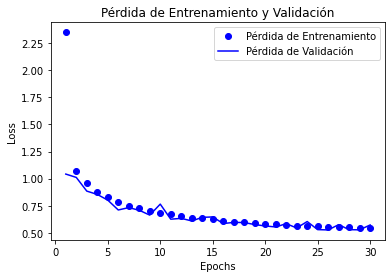

In [ ]:
pinta_perdida_entrenamiento_validacion(historia3)

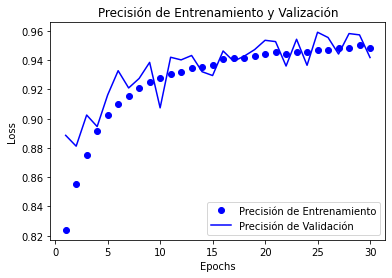

In [ ]:
pinta_precision_entrenamiento_validacion(historia3)

### Caso 4: Con Droput

In [28]:
network4 = crea_modelo(4)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [29]:
network4 = compila_modelo(network4)

In [30]:
historia4 = entrena_modelo(network4)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.3753 - accuracy: 0.8885 - val_loss: 0.1757 - val_accuracy: 0.9504
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1914 - accuracy: 0.9433 - val_loss: 0.1256 - val_accuracy: 0.9649
Epoch 3/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1504 - accuracy: 0.9549 - val_loss: 0.1037 - val_accuracy: 0.9696
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1260 - accuracy: 0.9631 - val_loss: 0.0948 - val_accuracy: 0.9712
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1136 - accuracy: 0.9660 - val_loss: 0.0880 - val_accuracy: 0.9744
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1020 - accuracy: 0.9709 - val_loss: 0.0853 - val_accuracy: 0.9756
Epoch 7/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0923 - accuracy: 0.9721 - val_loss: 0.0851 - val_accuracy: 0.9754
Epoch 

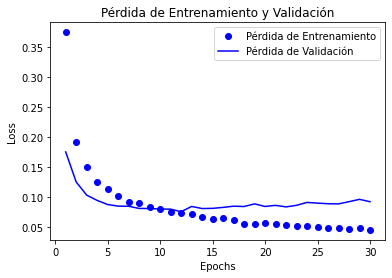

In [31]:
pinta_perdida_entrenamiento_validacion(historia4)

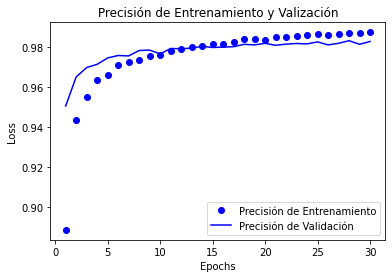

In [32]:
pinta_precision_entrenamiento_validacion(historia4)

### Caso 5: Error de código de regularizador

In [10]:
network5 = crea_modelo(5)

Error. Debe ser un número del 0 al 4


### CONCLUSIONES

**Primer Caso**: Cuando no hay regularizador, observamos que en la gráfica de pérdida de entrenamiento y validación, se produce un sobreentrenamiento pues la función de entrenamiento dista mucho de la función de validación.
Esto mismo pasa en la gráfica que mide la precisión de entrenamiento y validación. Ambas funciones distan mucho de coincidir.

**Segundo Caso:** Cuando se utiliza el regularizador `l1`, nos damos cuenta de que analizando la gráfica de pérdida, los datos se van ajustando más a la realidad, aun sin llegar a coincir al 100%, con algunos picos de sobreentrenamiento. Sin embargo, la precisión es inestable, en algunos casos lo hará bien, pero en muchos otros no será muy preciso.

Esto mismo pasará con el **tercer caso**, donde se ejecutará con el regularizador `l2`. La segunda gráfica (precisión), será igual de inestable que en el caso anterior, además, en este, la primera gráfica no estará tan ajustada, es decir, que se produce más sobreentrenamiento.

En el **cuarto caso**, utilizando el regularizador `l1_l2`, analizando la gráfica de la pérdida, observamos que es notablemente mejor en cuanto al resto de casos, sin embargo, la de la precisión se mantiene similar a las gráficas anteriores.

Por último, el **quinto caso**, utilizando un `dropout` del 50%, que es una función que trata de evitar el sobreentrenamiendo, ambas en ambas gráficas se puede observar que se produce un sobreentrenamiento. Sin embargo, si utilizamos un dropout del 60-70% ambas gráficas se estabilizan, aunque posiblemente se pierda generalidad.

Finalmente, **concluimos** que el mejor regularizador es el `l1_l2` que es el que tiene la mejor precisión.
